In [1]:
from zokyo.augmentation import Builder # Import Builder class from zokyo

import os
import sys
sys.path.append('custom_package/') # add your package to PATH variable

from custom_package import CustomOp # Import CustomOp class from your package

import json
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### Custom Operation

To use your custom operation follow these steps:
1. Write your own custom operation class by inheriting the Operation base class from Zokyo.
2. Use the ArgClass from Zokyo to parse the operation's required arguments (any operation used must have a probability value).
3. Import the operation class in the __init__.py file of your package (check the codes inside custom_package folder)
4. Add your package path to sys.path.
5. Add your package name and your custom operation class name to the config file and you are good to go.

In [2]:
with open('configs/custom_op_config.json', 'r') as f:
    pprint(json.load(f)) 
# here we can see the operation_module is the custom_package and contains the custom operation class

{'batch_ingestion': False,
 'debug': True,
 'input_dir': '../tests/images',
 'mask_dir': '../tests/masks',
 'multi_threaded': False,
 'operations': [{'args': {'is_mask': True, 'mask_label': 7, 'probability': 1},
                 'operation': 'CustomOp',
                 'operation_module': 'custom_package'}],
 'output_dir': 'output',
 'run_all': False,
 'sample': 6}


In [3]:
builder_custom_op = Builder('configs/custom_op_config.json')
gen = builder_custom_op.process_and_generate(batch_size=2) 
# the custom operation is a dummy one used for example purposes and just returns the input as output

2022-01-20 17:20:03,860 [Zokyo Builder] [INFO] sample factor : 3
2022-01-20 17:20:03,865 [Zokyo Builder] [INFO] batch size : 2
2022-01-20 17:20:03,885 [Zokyo Builder] [INFO] Entities num: 6


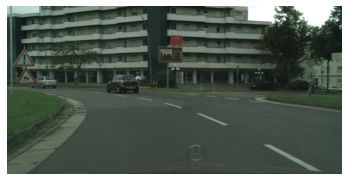

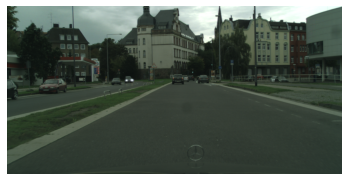

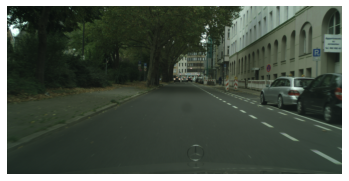

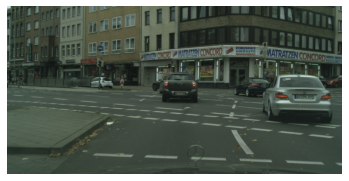

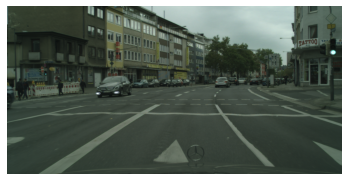

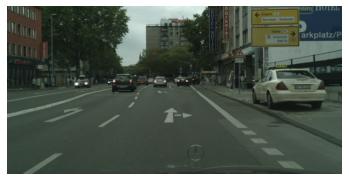

In [4]:
i = 0 
while True:
    try:
        res = next(gen) # each item in this batch is an instance of ZokyoData class
        for item in res:
            plt.figure()
            plt.axis('off')
            plt.imshow(item.image)
        i += 1

    except StopIteration:
        break